## Let's first import the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## About the dataset

You can download it at: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

To make it easier on you, name it **'custcat.csv'**, as this is the name I will use on my code

### Load data from the CSV file

In [3]:
data_raw = pd.read_csv('./data/custcat.csv')
data_raw.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


The dataset is composed of 12 columns: region, tenure, age, marital, address, income, ed, employ, retire, gender, reside and custcat

## Data Visualization and Analysis

#### First let's select the data we need

In [38]:
data = data_raw[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
data[0:5]

data_values = data_raw['custcat'].values
data_values[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

We need to normalize our data

In [39]:
data_normalized = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
data_normalized[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

With the data normalized our model can be more accurate

### Now we will separate our data into train and test

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, data_values, test_size=0.2, random_state=4)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


## Classification

### K-Nearest Neighbor (KNN)

#### Import library

In [41]:
from sklearn.neighbors import KNeighborsClassifier as KNC

#### Training

In [46]:
k = 4
neighbor = KNC(n_neighbors = k).fit(x_train, y_train)
print(neighbor)

KNeighborsClassifier(n_neighbors=4)


#### Predicting
We now can use the model to predict the test set

In [47]:
y_predict = neighbor.predict(x_test)
print(y_predict[0:5])

[3 1 3 4 4]


#### Accuracy

In [48]:
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, neighbor.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


#### As we can see, the accuracy was realy low with k=4, so we can test many other k values to see which one fits the best

In [55]:
Ks = 801 # 1 < K <= 801
mean_accuracy = np.zeros(Ks-1)
standard_accuracy = np.zeros(Ks-1)

for n in range (1,Ks):
    # Train model
    neighbors = KNC(n_neighbors = n).fit(x_train, y_train)
    y_predicts = neighbors.predict(x_test)
    
    # Calculate accuracy
    mean_accuracy[n-1] = accuracy_score(y_test, y_predicts)
    standard_accuracy = np.std(y_predicts == y_test) / np.sqrt(y_predicts.shape[0])
    
# Print mean accuracy
print(mean_accuracy)

[0.275 0.31  0.275 0.26  0.3   0.295 0.35  0.33  0.32  0.32  0.345 0.33
 0.32  0.34  0.355 0.32  0.335 0.34  0.355 0.345 0.325 0.345 0.345 0.34
 0.335 0.35  0.345 0.36  0.35  0.32  0.325 0.325 0.325 0.335 0.355 0.35
 0.335 0.325 0.375 0.36  0.36  0.335 0.335 0.345 0.375 0.375 0.37  0.365
 0.36  0.36  0.37  0.37  0.375 0.37  0.38  0.365 0.375 0.37  0.37  0.38
 0.365 0.36  0.38  0.36  0.36  0.375 0.375 0.365 0.365 0.36  0.37  0.37
 0.375 0.37  0.37  0.375 0.39  0.4   0.38  0.385 0.375 0.39  0.375 0.375
 0.38  0.39  0.385 0.385 0.375 0.365 0.37  0.37  0.37  0.375 0.385 0.385
 0.385 0.385 0.375 0.385 0.38  0.375 0.375 0.375 0.38  0.38  0.39  0.39
 0.38  0.385 0.395 0.4   0.395 0.405 0.395 0.4   0.4   0.395 0.39  0.385
 0.395 0.39  0.4   0.395 0.395 0.395 0.385 0.385 0.39  0.39  0.385 0.38
 0.385 0.385 0.385 0.385 0.38  0.38  0.375 0.375 0.375 0.38  0.38  0.38
 0.375 0.38  0.38  0.38  0.38  0.38  0.385 0.38  0.38  0.385 0.385 0.38
 0.38  0.385 0.38  0.38  0.38  0.38  0.38  0.38  0.375 0.38 

#### We can now plot a graph to see which K fit the best

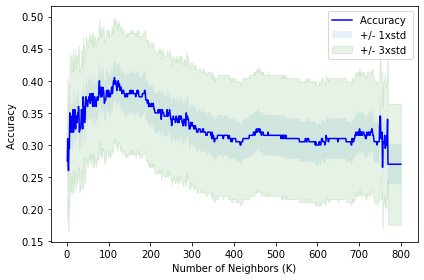

The best accuracy was with 0.405 with k= 114


In [56]:
plt.plot(range(1,Ks), mean_accuracy, color='blue')
plt.fill_between(range(1,Ks), mean_accuracy - 1 * standard_accuracy, mean_accuracy + 1 * standard_accuracy, alpha=0.10)
plt.fill_between(range(1,Ks), mean_accuracy - 3 * standard_accuracy, mean_accuracy + 3 * standard_accuracy, alpha=0.10, color = 'green')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy ')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1)

#### We can now see that the best K was 114, although it's accuracy was still very low.